In [2]:

import numpy as np

import os

import numpy as np

import matplotlib.pyplot as plt

import plotly.graph_objects as go

import gzip
import pickle as pkl

def loadall_results(path, horizon, n_folds):
    unpickled_objects = []
    with gzip.open(  path ,'rb') as file:
        while True:
            try:
                # Unpickle the next object in the file
                obj = pkl.load(file)
                unpickled_objects.append(obj)
            except EOFError:
                # End of file reached
                break
    result = np.array(unpickled_objects) #.reshape( (n_folds, horizon) )
    result = np.delete(result, 0, axis=0)
    return result

game = 'AT'
horizon = 2500
n_folds = 20
direct = './results/{}/'.format(game)
task = 'imbalanced'

def get_result(approach, context_type, task):
    path = os.path.join(direct, 'benchmark_{}_{}_{}_{}_{}.pkl.gz'.format(task, context_type, horizon, n_folds, approach) )
    res = loadall_results(path, horizon, n_folds)
    return res



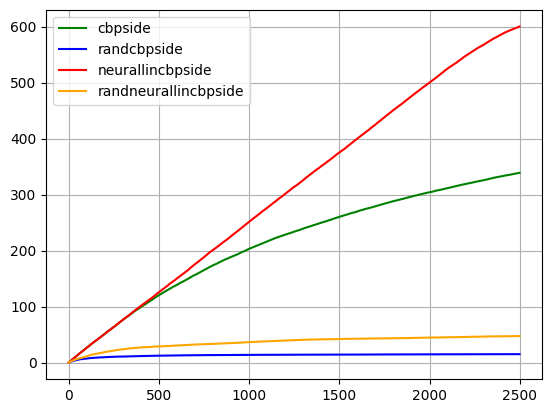

In [8]:
context_type = 'linear'

res1 = get_result( 'cbpside', context_type , task )
res2 = get_result( 'randcbpside', context_type , task )
res3 = get_result( 'neurallincbpside', context_type , task )
res4 = get_result( 'randneurallincbpside', context_type ,task )

plt.plot(range(horizon), np.mean(res1,0), label = 'cbpside', color = 'green')
plt.plot(range(horizon), np.mean(res2,0), label = 'randcbpside', color = 'blue')
plt.plot(range(horizon), np.mean(res3,0), label = 'neurallincbpside' , color = 'red')
plt.plot(range(horizon), np.mean(res4,0), label = 'randneurallincbpside' , color = 'orange')

plt.legend()
plt.grid()
plt.savefig('./benchmark_linear_neural.png')


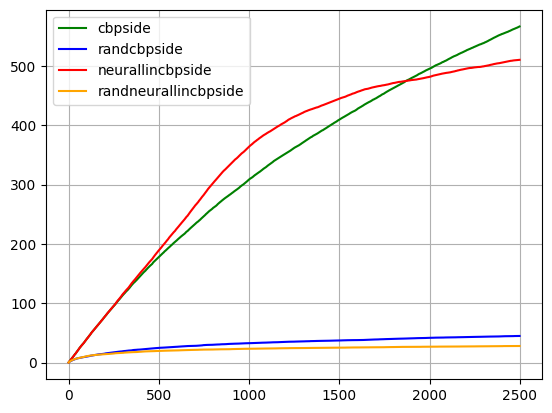

In [7]:
context_type = 'quadratic'

res1 = get_result( 'cbpside', context_type , task )
res2 = get_result( 'randcbpside', context_type , task )
res3 = get_result( 'neurallincbpside', context_type , task )
res4 = get_result( 'randneurallincbpside', context_type ,task )

plt.plot(range(horizon), np.mean(res1,0), label = 'cbpside', color = 'green')
plt.plot(range(horizon), np.mean(res2,0), label = 'randcbpside', color = 'blue')
plt.plot(range(horizon), np.mean(res3,0), label = 'neurallincbpside' , color = 'red')
plt.plot(range(horizon), np.mean(res4,0), label = 'randneurallincbpside' , color = 'orange')

plt.legend()
plt.grid()
plt.savefig('./benchmark_quadratic_neural.png')

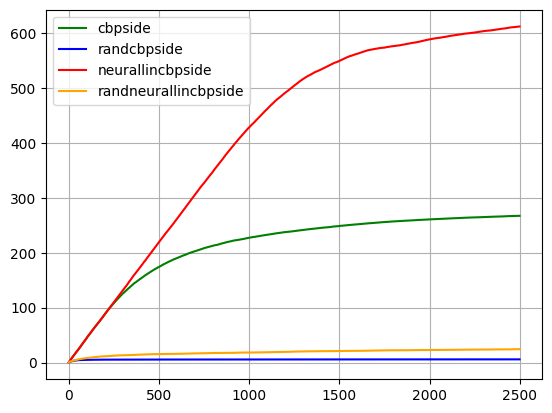

In [6]:
context_type = 'sinusoid'

res1 = get_result( 'cbpside', context_type , task )
res2 = get_result( 'randcbpside', context_type , task )
res3 = get_result( 'neurallincbpside', context_type , task )
res4 = get_result( 'randneurallincbpside', context_type ,task )

plt.plot(range(horizon), np.mean(res1,0), label = 'cbpside', color = 'green')
plt.plot(range(horizon), np.mean(res2,0), label = 'randcbpside', color = 'blue')
plt.plot(range(horizon), np.mean(res3,0), label = 'neurallincbpside' , color = 'red')
plt.plot(range(horizon), np.mean(res4,0), label = 'randneurallincbpside' , color = 'orange')

plt.legend()
plt.grid()
plt.savefig('./benchmark_sinusoid_neural.png')

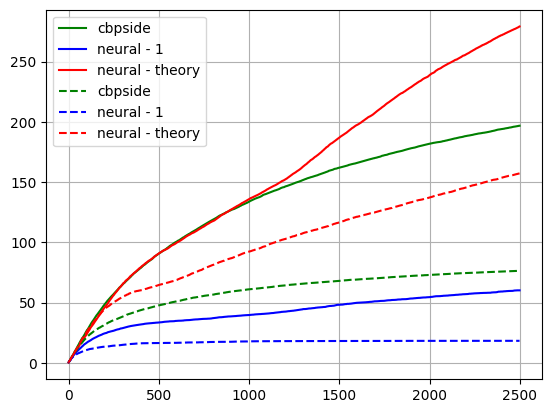

In [3]:
context_type = 'linear'

res1 = get_result( 'cbpside_theory', context_type , '2' )
res2 = get_result( 'neuralcbp_1', context_type , '2' )
res5 = get_result( 'neuralcbp_theory', context_type , '2' )

plt.plot(range(horizon), np.mean(res1,0), label = 'cbpside', color = 'green')
plt.plot(range(horizon), np.mean(res2,0), label = 'neural - 1', color = 'blue')
plt.plot(range(horizon), np.mean(res5,0), label = 'neural - theory' , color = 'red')

res1 = get_result( 'cbpside_theory', context_type , '3' )
res2 = get_result( 'neuralcbp_1', context_type , '3' )
res5 = get_result( 'neuralcbp_theory', context_type , '3' )

plt.plot(range(horizon), np.mean(res1,0), label = 'cbpside',  linestyle='--', color = 'green')
plt.plot(range(horizon), np.mean(res2,0), label = 'neural - 1',  linestyle='--', color = 'blue')
plt.plot(range(horizon), np.mean(res5,0), label = 'neural - theory',  linestyle='--', color = 'red')

# res1 = get_result( 'cbpside_theory', context_type , '4' )
# res2 = get_result( 'neuralcbp_1', context_type , '4' )
# res5 = get_result( 'neuralcbp_theory', context_type , '4' )

# plt.plot(range(horizon), np.mean(res1,0), label = 'cbpside',  linestyle='-.', color = 'green')
# plt.plot(range(horizon), np.mean(res2,0), label = 'neural - 1',  linestyle='-.', color = 'blue')
# plt.plot(range(horizon), np.mean(res5,0), label = 'neural - theory',  linestyle='-.', color = 'red')

plt.legend()
plt.grid()
plt.savefig('./benchmark_linear.png')


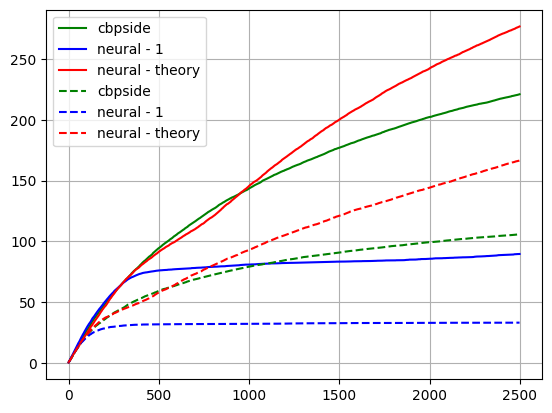

In [4]:
context_type = 'quadratic'

res1 = get_result( 'cbpside_theory', context_type , '2' )
res2 = get_result( 'neuralcbp_1', context_type , '2' )
res5 = get_result( 'neuralcbp_theory', context_type , '2' )

plt.plot(range(horizon), np.mean(res1,0), label = 'cbpside', color = 'green')
plt.plot(range(horizon), np.mean(res2,0), label = 'neural - 1', color = 'blue')
plt.plot(range(horizon), np.mean(res5,0), label = 'neural - theory' , color = 'red')

res1 = get_result( 'cbpside_theory', context_type , '3' )
res2 = get_result( 'neuralcbp_1', context_type , '3' )
res5 = get_result( 'neuralcbp_theory', context_type , '3' )

plt.plot(range(horizon), np.mean(res1,0), label = 'cbpside',  linestyle='--', color = 'green')
plt.plot(range(horizon), np.mean(res2,0), label = 'neural - 1',  linestyle='--', color = 'blue')
plt.plot(range(horizon), np.mean(res5,0), label = 'neural - theory',  linestyle='--', color = 'red')

# res1 = get_result( 'cbpside_theory', context_type , '4' )
# res2 = get_result( 'neuralcbp_1', context_type , '4' )
# res5 = get_result( 'neuralcbp_theory', context_type , '4' )

# plt.plot(range(horizon), np.mean(res1,0), label = 'cbpside',  linestyle='-.', color = 'green')
# plt.plot(range(horizon), np.mean(res2,0), label = 'neural - 1',  linestyle='-.', color = 'blue')
# plt.plot(range(horizon), np.mean(res5,0), label = 'neural - theory',  linestyle='-.', color = 'red')

plt.legend()
plt.grid()
plt.savefig('./benchmark_quadratique.png')

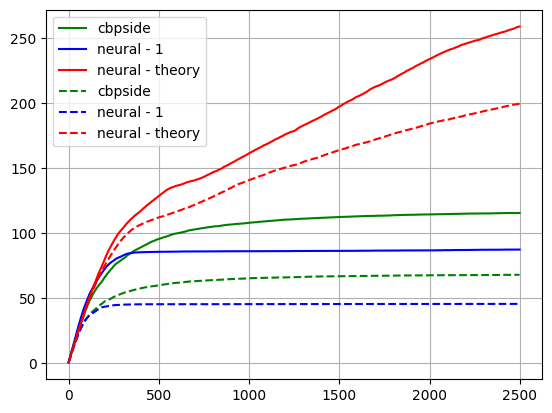

In [5]:
context_type = 'sinusoid'

res1 = get_result( 'cbpside_theory', context_type , '2' )
res2 = get_result( 'neuralcbp_1', context_type , '2' )
res5 = get_result( 'neuralcbp_theory', context_type , '2' )

plt.plot(range(horizon), np.mean(res1,0), label = 'cbpside', color = 'green')
plt.plot(range(horizon), np.mean(res2,0), label = 'neural - 1', color = 'blue')
plt.plot(range(horizon), np.mean(res5,0), label = 'neural - theory' , color = 'red')

res1 = get_result( 'cbpside_theory', context_type , '3' )
res2 = get_result( 'neuralcbp_1', context_type , '3' )
res5 = get_result( 'neuralcbp_theory', context_type , '3' )

plt.plot(range(horizon), np.mean(res1,0), label = 'cbpside',  linestyle='--', color = 'green')
plt.plot(range(horizon), np.mean(res2,0), label = 'neural - 1',  linestyle='--', color = 'blue')
plt.plot(range(horizon), np.mean(res5,0), label = 'neural - theory',  linestyle='--', color = 'red')

# res1 = get_result( 'cbpside_theory', context_type , '4' )
# res2 = get_result( 'neuralcbp_1', context_type , '4' )
# res5 = get_result( 'neuralcbp_theory', context_type , '4' )

# plt.plot(range(horizon), np.mean(res1,0), label = 'cbpside',  linestyle='-.', color = 'green')
# plt.plot(range(horizon), np.mean(res2,0), label = 'neural - 1',  linestyle='-.', color = 'blue')
# plt.plot(range(horizon), np.mean(res5,0), label = 'neural - theory',  linestyle='-.', color = 'red')

plt.legend()
plt.grid()
plt.savefig('./benchmark_sinusoid.png')
# for i in res:
#     plt.plot( range(horizon), i )

# plt.savefig('./{}.png'.format(approach) )